### pvlib-python supports two ways to generate clear sky irradiance:

    A Location object’s get_clearsky() method.
    The functions contained in the clearsky module, including ineichen() and simplified_solis().


In [1]:
import os
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.iotools import read_tmy3

The easiest way to obtain a time series of clear sky irradiance is to use a Location object’s get_clearsky() method. The get_clearsky() method does the dirty work of calculating solar position, extraterrestrial irradiance, airmass, and atmospheric pressure, as appropriate, leaving the user to only specify the most important parameters: time and atmospheric attenuation. The time input must be a pandas.DatetimeIndex, while the atmospheric attenuation inputs may be constants or arrays. The get_clearsky() method always returns a pandas.DataFrame.

In [3]:
tonala = Location(20.56, -103.22, 'America/Mexico_City', 1544, 'Tonalá')

In [4]:
times = pd.date_range(start='2019/07/01', end='2019/07/04', freq='1min', tz=tonala.tz)

In [5]:
cs = tonala.get_clearsky(times) # ineichen with climatology table by default

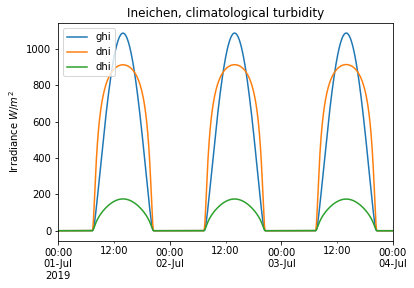

In [6]:
cs.plot()
plt.ylabel('Irradiance $W/m^2$');
plt.title('Ineichen, climatological turbidity');